In [1]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

In [2]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [3]:
model=Sequential()

#The first CNN layer followed by Relu and MaxPooling layers
model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#The second convolution layer followed by Relu and MaxPooling layers
model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#Flatten layer to stack the output convolutions from second convolution layer
model.add(Flatten())
model.add(Dropout(0.5))

#Dense layer of 64 neurons
model.add(Dense(50,activation='relu'))
#The Final layer with two outputs for two categories
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [4]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [5]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Train on 990 samples, validate on 248 samples
Epoch 1/20
990/990 [==============================] - 42s 42ms/step - loss: 0.6608 - accuracy: 0.5909 - val_loss: 0.5702 - val_accuracy: 0.6895
Epoch 2/20
990/990 [==============================] - 43s 43ms/step - loss: 0.4574 - accuracy: 0.7848 - val_loss: 0.4187 - val_accuracy: 0.8065
Epoch 3/20
990/990 [==============================] - 43s 44ms/step - loss: 0.3093 - accuracy: 0.8717 - val_loss: 0.3079 - val_accuracy: 0.8710
Epoch 4/20
990/990 [==============================] - 43s 44ms/step - loss: 0.2102 - accuracy: 0.9202 - val_loss: 0.2640 - val_accuracy: 0.9032
Epoch 5/20
990/990 [==============================] - 67s 67ms/step - loss: 0.1994 - accuracy: 0.9192 - val_loss: 0.2009 - val_accuracy: 0.9355
Epoch 6/20
990/990 [==============================] - 47s 48ms/step - loss: 0.1412 - accuracy: 0.9495 - val_loss: 0.1835 - val_accuracy: 0.9395
Epoch 7/20
990/990 [==============================] - 47s 48ms/step - loss: 0.1466 - accur

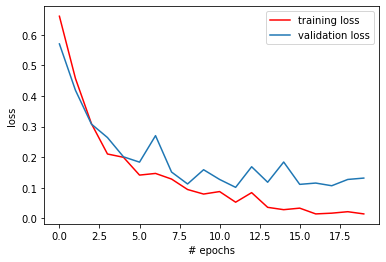

In [6]:
from matplotlib import pyplot as plt

#Loss Plot
plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

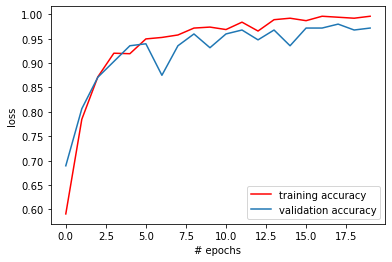

In [7]:
#Accuracy Plot
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [8]:
print(model.evaluate(test_data,test_target))

138/138 [==============================] - 2s 12ms/step
[0.09745505862477896, 0.9637681245803833]
